# Model will be trained with BinaryInteraction NotInteractedSample Data

BinaryInteraction NotInteractedSample dataset contains only interacted pairs and a small sample of not interacted pairs

Although BinaryInteraction NotInteractedSample dataset is more useful than the BinaryInteraction InteractedOnly dataset

It is not a good dataset for the recommendation system

Users may not have liked a movie they watched or users may like a movie they haven't watched

Users should be offered movies that they might like, and the user-item relationship should be based on like.

Since this project is a movie recommendation system this dataset useless as well

There is no any expectation from this training

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings

In [2]:
#Printing library versions
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('tensorflow Version: ' + tf.__version__)

numpy Version: 1.16.5
pandas Version: 0.25.1
tensorflow Version: 2.0.0


In [3]:
#GPU will be used for training
myGPU = tf.test.gpu_device_name()
if myGPU:
    print(myGPU)
else:
    print("Error")

/device:GPU:0


In [4]:
#Reading Qualified BinaryInteraction NotInteractedSample training data from pkl file
trainingDf = pd.read_pickle("../Data/pkl/1M/Qualified/BinaryInteraction/NotInteractedSample/Training.pkl")
trainingDf

,UserId,MovieId,Interaction
0,5282,244,1
1,766,213,1
2,8209,1198,1
3,1067,1828,1
4,6915,1256,1
...,...,...,...
1001131,10072,1095,1
1001132,133,396,1
1001133,8852,6102,1
1001134,5174,4218,0


In [5]:
#creating a user array for training input 
trainingUser = trainingDf[['UserId']].values.astype(np.int32)
trainingUser = trainingUser.reshape((trainingUser.shape[0]))
trainingUser

array([5282,  766, 8209, ..., 8852, 5174, 2711])

In [6]:
#creating a movie array for training input 
trainingMovie = trainingDf[['MovieId']].values.astype(np.int32)
trainingMovie = trainingMovie.reshape((trainingMovie.shape[0]))
trainingMovie

array([ 244,  213, 1198, ..., 6102, 4218, 3209])

In [7]:
#creating an array for training input 
trainingX = [trainingUser, trainingMovie]
trainingX

[array([5282,  766, 8209, ..., 8852, 5174, 2711]),
 array([ 244,  213, 1198, ..., 6102, 4218, 3209])]

In [8]:
#creating an array for training output 
trainingY = trainingDf[['Interaction']].values.astype(np.int8)
trainingY = trainingY.reshape((trainingY.shape[0]))
trainingY

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [9]:
#Clearing Memory
del trainingDf

In [10]:
#Reading Qualified BinaryInteraction NotInteractedSample validation data from pkl file
validationDf = pd.read_pickle("../Data/pkl/1M/Qualified/BinaryInteraction/NotInteractedSample/Validation.pkl")
validationDf

,UserId,MovieId,Interaction
0,8455,142,1
1,1945,530,1
2,7588,4030,1
3,6186,3563,1
4,1088,8835,1
...,...,...,...
166689,8048,1278,1
166690,5234,4508,0
166691,9471,19733,0
166692,8078,15906,0


In [11]:
#creating a user array for validation input 
validationUser = validationDf[['UserId']].values.astype(np.int32)
validationUser = validationUser.reshape((validationUser.shape[0]))
validationUser

array([8455, 1945, 7588, ..., 9471, 8078, 5809])

In [12]:
#creating a movie array for validation input 
validationMovie = validationDf[['MovieId']].values.astype(np.int32)
validationMovie = validationMovie.reshape((validationMovie.shape[0]))
validationMovie

array([  142,   530,  4030, ..., 19733, 15906,   337])

In [13]:
#creating an array for validation input 
validationX = [validationUser, validationMovie]
validationX

[array([8455, 1945, 7588, ..., 9471, 8078, 5809]),
 array([  142,   530,  4030, ..., 19733, 15906,   337])]

In [14]:
#creating an array for validation output 
validationY = validationDf[['Interaction']].values.astype(np.int8)
validationY = validationY.reshape((validationY.shape[0]))
validationY

array([1, 1, 1, ..., 0, 0, 1], dtype=int8)

In [15]:
#Clearing Memory
del validationDf

In [16]:
#Setting model variables
userSize = 10073
movieSize = 22033
latentDimensionMF = 4
latentDimensionMLP = 32
regMF = 0
regMLP = 0.01
regDense = 0.01
denseActivation = 'relu'

In [17]:
#Creating Neural Collaborative Filtering(NCF) model


#This Neural matrix factorization model based on https://arxiv.org/pdf/1708.05031.pdf
#As a result of the researches, it was determined as the most useful architecture
#This architecture will be trained with different data types and explanations will be made on the results. 

# input layer
userInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "userId")
movieInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "movieId")

# embedding layers
userEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMF,
    name = 'userEmbeddingMF',
    embeddings_initializer = 'he_normal',
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)
movieEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMF,
    name = "movieEmbeddingMF",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)

userEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMLP,
    name = "userEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)
movieEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMLP,
    name="movieEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)

# MF vector
userLatentMF = tf.keras.layers.Flatten()(userEmbeddingMF(userInput))
movieLatentMF = tf.keras.layers.Flatten()(movieEmbeddingMF(movieInput))
catLatentMF = tf.keras.layers.Multiply()([userLatentMF, movieLatentMF])

# MLP vector
userLatentMLP = tf.keras.layers.Flatten()(userEmbeddingMLP(userInput))
movieLatentMLP = tf.keras.layers.Flatten()(movieEmbeddingMLP(movieInput))
catLatentMLP = tf.keras.layers.Concatenate()([userLatentMLP, movieLatentMLP])

vectorMLP = catLatentMLP

layer = tf.keras.layers.Dense(
    32,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense1'
)

vectorMLP = layer(vectorMLP)

layer = tf.keras.layers.Dense(
    16,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense2'
)

vectorMLP = layer(vectorMLP)

predictLayer = tf.keras.layers.Concatenate()([catLatentMF, vectorMLP])

result = tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="lecun_uniform", name="Interaction")

output = result(predictLayer)

model = tf.keras.models.Model(inputs = [userInput, movieInput], outputs = [output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
userId (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
movieId (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
userEmbeddingMLP (Embedding)    (None, 32)           322336      userId[0][0]                     
__________________________________________________________________________________________________
movieEmbeddingMLP (Embedding)   (None, 32)           705056      movieId[0][0]                    
______________________________________________________________________________________________

In [18]:
#Compile model
#Since the dataset has 2 label [0, 1] - ['Not Interacted', 'Interacted'] binary crossentropy function will be used as loss function
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.BinaryAccuracy(name="accuracy")
    ])

In [19]:
#Defining CallBack class for save model
class ModelSaver(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        #calculation based on epoch + 1 Due to first epoch starts at 0
        if (epoch + 1) % 2 == 0:
            self.model.save("../Model/NotInteractedSampleModel/Model{}.h5".format(epoch + 1))

In [20]:
#ignore warnings due to Converting sparse IndexedSlices to a dense Tensor of unknown shape warning
warnings.filterwarnings('ignore')

#Fit the model
#This dataset categorized as interacted movies and not interacted movies
#Since interaction does not a score of like, this dataset is not a good option
#Since this data actually cannot use for recommendation model just fitting with small epoch size
#There is no any expectations from this training
with tf.device('/GPU:0'):
    trainingHistory = model.fit(
        x = trainingX,
        y = trainingY,
        batch_size = 64,
        shuffle = True,
        callbacks=[ModelSaver()],
        epochs = 8,
        verbose = 1,
        validation_data = (validationX, validationY),
    )

Train on 1001136 samples, validate on 166694 samples
Epoch 1/8
1001136/1001136 [==============================] - 251s 251us/sample - loss: 0.4847 - tp: 715701.0000 - fp: 59292.0000 - tn: 191030.0000 - fn: 35113.0000 - accuracy: 0.9057 - val_loss: 0.3624 - val_tp: 119513.0000 - val_fp: 6187.0000 - val_tn: 35461.0000 - val_fn: 5533.0000 - val_accuracy: 0.9297
Epoch 2/8
1001136/1001136 [==============================] - 338s 337us/sample - loss: 0.3387 - tp: 720678.0000 - fp: 35237.0000 - tn: 215085.0000 - fn: 30136.0000 - accuracy: 0.9347 - val_loss: 0.3503 - val_tp: 120600.0000 - val_fp: 6468.0000 - val_tn: 35180.0000 - val_fn: 4446.0000 - val_accuracy: 0.9345
Epoch 3/8
1001136/1001136 [==============================] - 336s 336us/sample - loss: 0.3286 - tp: 724680.0000 - fp: 35507.0000 - tn: 214815.0000 - fn: 26134.0000 - accuracy: 0.9384 - val_loss: 0.3385 - val_tp: 120529.0000 - val_fp: 6072.0000 - val_tn: 35576.0000 - val_fn: 4517.0000 - val_accuracy: 0.9365
Epoch 4/8
1001136/10011

In [21]:
#Checking Training history data
trainingHistory.history

{'loss': [0.4847287968434806,
  0.33871325597430646,
  0.3285666332862191,
  0.3156431468929688,
  0.3151984424021967,
  0.2860534334577684,
  0.29557686649722886,
  0.27753527922370136],
 'tp': [715701.0,
  720678.0,
  724680.0,
  726290.0,
  727495.0,
  728608.0,
  729137.0,
  729875.0],
 'fp': [59292.0,
  35237.0,
  35507.0,
  35158.0,
  34789.0,
  34049.0,
  33384.0,
  32977.0],
 'tn': [191030.0,
  215085.0,
  214815.0,
  215164.0,
  215533.0,
  216273.0,
  216938.0,
  217345.0],
 'fn': [35113.0,
  30136.0,
  26134.0,
  24524.0,
  23319.0,
  22206.0,
  21677.0,
  20939.0],
 'accuracy': [0.9057021,
  0.9347012,
  0.93842894,
  0.9403857,
  0.94195795,
  0.94380885,
  0.9450015,
  0.9461452],
 'val_loss': [0.3623602443760209,
  0.3503039794681794,
  0.3384767449993646,
  0.3325741026570064,
  0.34564335077694586,
  0.3208438287804302,
  0.3193814502464141,
  0.32054571046441416],
 'val_tp': [119513.0,
  120600.0,
  120529.0,
  120632.0,
  120564.0,
  120723.0,
  120879.0,
  121500.0]

In [22]:
#Import pyplot for graphics
from matplotlib import pyplot as plt

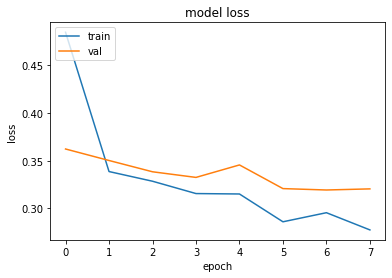

In [23]:
#Loss Graph
plt.plot(trainingHistory.history['loss'])
plt.plot(trainingHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

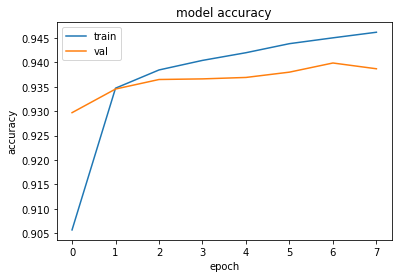

In [24]:
#Accuracy Graph
plt.plot(trainingHistory.history['accuracy'])
plt.plot(trainingHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

In [25]:
#Reading Qualified BinaryInteraction NotInteractedSample test data from pkl file
testDf = pd.read_pickle("../Data/pkl/1M/Qualified/BinaryInteraction/NotInteractedSample/Test.pkl")
testDf

,UserId,MovieId,Interaction
0,604,444,1
1,4908,10378,1
2,6086,865,1
3,1424,4067,0
4,6893,1406,1
...,...,...,...
166689,5750,1053,1
166690,5146,18003,0
166691,9484,9793,1
166692,2433,491,1


In [26]:
#creating a user array for test input 
testUser = testDf[['UserId']].values.astype(np.int32)
testUser = testUser.reshape((testUser.shape[0]))
testUser

array([ 604, 4908, 6086, ..., 9484, 2433, 6769])

In [27]:
#creating a movie array for test input 
testMovie = testDf[['MovieId']].values.astype(np.int32)
testMovie = testMovie.reshape((testMovie.shape[0]))
testMovie

array([  444, 10378,   865, ...,  9793,   491, 15255])

In [28]:
#creating an array for test input 
testX = [testUser, testMovie]
testX

[array([ 604, 4908, 6086, ..., 9484, 2433, 6769]),
 array([  444, 10378,   865, ...,  9793,   491, 15255])]

In [29]:
#creating an array for test output 
testY = testDf[['Interaction']].values.astype(np.int8)
testY = testY.reshape((testY.shape[0]))
testY

array([1, 1, 1, ..., 1, 1, 0], dtype=int8)

In [30]:
#Clearing Memory
del testDf

In [31]:
#Model evaluating with test values
testResult = model.evaluate(x = testX, y = testY, batch_size = 64, verbose = 0)

In [32]:
#Print testResult
testResult

[0.3247911827064958, 121393.0, 6833.0, 34828.0, 3640.0, 0.9371723]

In [33]:
#Print Test Loss
print('Test Loss: ' + str(testResult[0]))

Test Loss: 0.3247911827064958


In [34]:
#Print Test Accuracy
print('Test Accuracy: ' + str(testResult[5]))

Test Accuracy: 0.9371723


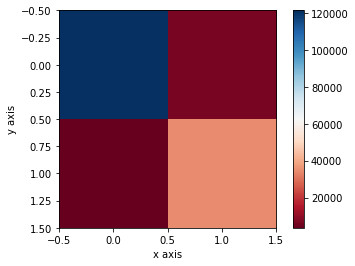

In [35]:
#Confusion Matrix
#[tp][fp]
#[fn][tn]
cm = [[testResult[1], testResult[2]],
      [testResult[4], testResult[3]]]

plt.xlabel('x axis')
plt.ylabel('y axis')

im = plt.imshow(cm,cmap=plt.cm.RdBu)

plt.colorbar(im)
plt.show()

# Analysing Result

When the metric graphs are examined, it is seen that the best model is the model obtained at the end of the training

So Model8 is selected as Best Model in this training

Result look really good

But still I dont think dataset is usefull for recommendation system

Also there can be a kind of overfitting becouse size difference between positive and negative samples